# Map Matching Project - Phase 1
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi - Hamidreza Yaghoubi - Alireza Heidari - Reza Vahidi Majd - Parham Rezaei<h3>
<h3 style = "color: cyan"> Documents Designed by: Mohammad Moshtaghi Far<h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase1.ipynb or .zip </h5>
</div>

Setting up the environment

In [38]:
%pip install pyrosm keplergl haversine pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [39]:
import datetime
import numpy as np
import pandas as pd
import pyrosm
import random
import ssl
import time

from keplergl import KeplerGl
from pyrosm import OSM, get_data

In [40]:
# Map Configurations:
config_1 = {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '95m4t7j',
     'type': 'point',
     'config': {'dataId': 'streets',
      'label': 'nodes2',
      'color': [77, 193, 156],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'v_lat', 'lng': 'v_lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': 'jbj80d',
     'type': 'point',
     'config': {'dataId': 'streets',
      'label': 'nodes2',
      'color': [77, 193, 156],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'u_lat', 'lng': 'u_lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'streets': [{'name': 'street_id',
        'format': None},
       {'name': 'u', 'format': None},
       {'name': 'v', 'format': None},
       {'name': 'length', 'format': None},
       {'name': 'oneway', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 35.77111563619981,
   'longitude': 51.45539631358617,
   'pitch': 0,
   'zoom': 13.80416673176895,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

config_2 = {'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['trip'],
     'id': 'vbi8ol9j',
     'name': ['timestamp'],
     'type': 'timeRange',
     'value': [1704533318000, 1704533360000],
     'enlarged': True,
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'speed': 1}],
   'layers': [{'id': '890afcz',
     'type': 'point',
     'config': {'dataId': 'trip',
      'label': 'Point',
      'color': [77, 193, 156],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'ColorBrewer YlGnBu-6',
        'type': 'sequential',
        'category': 'ColorBrewer',
        'colors': ['#ffffcc',
         '#c7e9b4',
         '#7fcdbb',
         '#41b6c4',
         '#2c7fb8',
         '#253494']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'timestamp',
       'type': 'timestamp'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'trip': [{'name': 'timestamp',
        'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 35.77503816328773,
   'longitude': 51.45760115843504,
   'pitch': 0,
   'zoom': 14.250853727965412,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

config_3 = {'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['ride'],
     'id': '9lcw1lzo',
     'name': ['timestamp'],
     'type': 'timeRange',
     'value': [1704531448675, 1704531452675],
     'enlarged': True,
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'speed': 1}],
   'layers': [{'id': '13v5d9h',
     'type': 'point',
     'config': {'dataId': 'ride',
      'label': 'Point',
      'color': [241, 92, 23],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Uber Viz Diverging 1.5',
        'type': 'diverging',
        'category': 'Uber',
        'colors': ['#00939C',
         '#5DBABF',
         '#BAE1E2',
         '#F8C0AA',
         '#DD7755',
         '#C22E00']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'timestamp',
       'type': 'timestamp'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'ride': [{'name': 'timestamp',
        'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 35.770074283246004,
   'longitude': 51.4518319383996,
   'pitch': 0,
   'zoom': 13.522313010849986,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

config_4 = {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '2zv158l',
     'type': 'point',
     'config': {'dataId': 'Original',
      'label': 'Point',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': 'ohwko3b',
     'type': 'point',
     'config': {'dataId': 'Uniform',
      'label': 'Point',
      'color': [18, 92, 119],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': 'j59sk6',
     'type': 'point',
     'config': {'dataId': 'Normal',
      'label': 'Point',
      'color': [77, 193, 156],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': '8obey9v',
     'type': 'point',
     'config': {'dataId': 'Exponential',
      'label': 'Point',
      'color': [119, 110, 87],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': 'tbf478',
     'type': 'point',
     'config': {'dataId': 'Normal_speed',
      'label': 'Point',
      'color': [23, 184, 190],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Original': [{'name': 'timestamp',
        'format': None}],
      'Uniform': [{'name': 'timestamp', 'format': None}],
      'Normal': [{'name': 'timestamp', 'format': None}],
      'Exponential': [{'name': 'timestamp', 'format': None}],
      'Normal_speed': [{'name': 'timestamp', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 35.77412536181311,
   'longitude': 51.447517306843565,
   'pitch': 0,
   'zoom': 15,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

config_5 = {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'aubru7o',
     'type': 'point',
     'config': {'dataId': 'Original',
      'label': 'Point',
      'color': [47, 197, 204],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': 'b5rjzgg',
     'type': 'point',
     'config': {'dataId': 'Noisy',
      'label': 'Point',
      'color': [250, 116, 0],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Original': [{'name': 'timestamp',
        'format': None}],
      'Noisy': [{'name': 'timestamp', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 35.77441514569873,
   'longitude': 51.448100816811916,
   'pitch': 0,
   'zoom': 15,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

config_6 = {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'fmvpuni',
     'type': 'point',
     'config': {'dataId': 'Noisy',
      'label': 'Point',
      'color': [255, 152, 51],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': 'bvov52g',
     'type': 'point',
     'config': {'dataId': 'Denoised',
      'label': 'Point',
      'color': [105, 79, 214],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Noisy': [{'name': 'timestamp',
        'format': None}],
      'Denoised': [{'name': 'timestamp', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 35.77186192868649,
   'longitude': 51.446787628356134,
   'pitch': 0,
   'zoom': 14.39961773797643,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

In [41]:
# # If you are using colab, you need to run this cell
# from google.colab import output
# output.enable_custom_widget_manager()

## Introduction
In this phase of project, you are going to implement a *denoising algorithm*. In many cases, when an application is dealing with _user GPS location_, in many urban areas and the places with tall towers, the GPS signal gets too noisy! This is the reason of why when you open "google maps", you see your current location with a blue circle around it. The radius of this circle shows the accuracy of your location. Sometimes, this radius is around 10m and in other areas, it goes in scale of km, making the GPS location totally unstable and unreliable! This amount of noise makes it impossible to use the data for any kind of analysis. In "ride hailing" applications like Uber, many of functionalities rely on the accuracy of GPS data. E.g. ETA estimation (Estimated time of arrival) is highly dependent on the accuracy of GPS data. In this phase, you are going to implement a denoising algorithm to make the GPS data more reliable. You will use your kowledge of Hidden Markov Models to implement this algorithm.

<div style="text-align: center">
<img src="./Images/blue_dot.jpg" height="500" width="auto" /> </br>
(Sample of GPS data with blue dot)
</div>

# Loading Pasdaran streets dataset

In this section, you will load a dataset that is prepared for you. The dataset contains some GPS locations (nodes) from Pasdaran Streets and also another dataset which contains the "streets" in Pasdaran area. By "street" we mean a pair of nodes, representing two end-points of a street in the map. These datasets are in `Data/` folder with names `pasdaran_streets.csv` and `pasdaran_nodes.csv`.

In [42]:
# Load the data
pasdaran_streets = pd.read_csv('pasdaran_streets.csv')
pasdaran_nodes = pd.read_csv('pasdaran_nodes.csv')

In [43]:
pasdaran_streets.head()

,street_id,u,v,length,oneway,u_lat,u_lon,v_lat,v_lon
0,5003747,423833948,423793584,90.570,no,35.772419,51.465652,35.771748,51.465084
1,17099043,177540293,423832815,296.273,yes,35.771034,51.464462,35.772175,51.461494
2,787945693,4429684144,423832815,62.573,no,35.772636,51.461891,35.772175,51.461494
3,687277053,177540293,423793585,97.898,no,35.771034,51.464462,35.770317,51.463833
4,36333153,9339973930,423793585,296.275,yes,35.771458,51.460865,35.770317,51.463833


In [44]:
pasdaran_nodes.head()

,id,lat,lon
0,423833948,35.772419,51.465652
1,423793584,35.771748,51.465084
2,177536927,35.776230,51.465034
3,177540293,35.771034,51.464462
4,423832815,35.772175,51.461494


In [45]:
# Visualize pasdaran_streets using kepler
map_1 = KeplerGl(height=600, config=config_1)
map_1.add_data(data=pasdaran_streets, name='streets')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '95m4t7j', 'type': …

# Creating dataset for trip

As you understood, until now, we loaded 2 datasets, `pasdaran_nodes` and `pasdaran_streets`. Now, we should create a dataset from these, such that we can use it for our trip. Each item in this dataset is called a `ride`. We will explain more as we go on.

First, we should create a **trip** for a driver. For this sake, we should choose 2 random points in our map as the source and destination of the trip. Now, we should find the streets that connect these 2 points. Each street has a length. You should find the shortest path between these 2 points (source and destination) which are in the `pasdaran_streets`. Note that this path should be the **shortest path** meaning that the sum of the lengths of streets should be minimum.

**NOTE**: You cannot use any library for finding the shortest path. You should implement it yourself, from scratch. Feel free to use any algorithm and heuristic that you want. Be creative!

**NOTE**: Be aware of "length of streets" and whether or not they are "one_way"!

In [46]:
# TODO: You should implement this from scratch and you cannot use any library (such as networkx) for finding the shortest path.
import heapq

def dijkstra(graph, start, end, node_ids):
    distances = {node: float('inf') for node in node_ids}
    distances[start] = 0
    priority_q = [(0, start)]  # (distance, node)
    previous = {}
    while priority_q:
        current_dist, current_node = heapq.heappop(priority_q)

        if current_node == end:
            path = []
            while current_node in previous:
                path.insert(0, current_node)
                current_node = previous[current_node]
            path.insert(0, start)
            return path, distances[end]

        for neighbor, edge_length in graph[current_node]:
            distance = current_dist + edge_length
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_q, (distance, neighbor))
                previous[neighbor] = current_node

    return [], float('inf')  # No path
    


def find_shortest_path(start_node, end_node, graph):
    """
    Find the shortest path between two nodes in a graph.
    :param start_node: The start node
    :param end_node: The end node
    :param graph: The graph
    :return: The shortest path. It is a list of node_ids from start_node to end_node.
    Note that you use all of the data in "pasdaran_streets" dataset appropriately such as "street_length" and "one_way".
    """
    adj_list = {}
    nodes = []
    graph = np.array(graph)
    start = None
    end = None
    for i in range(len(graph)):
        if start is None and (graph[i][5], graph[i][6]) == start_node:
            start = graph[i][1]
        if start is None and (graph[i][7], graph[i][8]) == start_node:
            start = graph[i][2]
        if end is None and (graph[i][5], graph[i][6]) == end_node:
            end = graph[i][1]
        if end is None and (graph[i][7], graph[i][8]) == end_node:
            end = graph[i][2]
        if graph[i][2] not in adj_list:
            adj_list[graph[i][2]] = []
        adj_list[graph[i][2]].append((graph[i][1], graph[i][3]))
        if graph[i][1] not in adj_list:
            adj_list[graph[i][1]] = []
        adj_list[graph[i][1]].append((graph[i][2], graph[i][3]))
        nodes.append(graph[i][1])
        nodes.append(graph[i][2])
    nodes = list(set(nodes))
    path, distance = dijkstra(adj_list, start, end, nodes)
    return path


You should **upload** this cell (`find_shortest_path` function) as a .py file to quera. Your code will be verified if it is actually finding the shortest path and only if it's correct, you will get the grades of this section. Be sure that you put the approriate `import ...` statements at the first of your `.py` file. Remember, you **can not** use any library that does the "shortest path" for you. (like networkx) You should implement it yourself.

**Note**: You can add other functions and codes to above cell, but you code should have the `find_shortest_path` function with exactly same signature that we have provided. Your code will be tested with calling this function. So, using other functions is not a problem, but keep in mind that the main entry for your code when we test it is the `find_shortest_path` function. Nothing else!

In [47]:
# Create a trip: Choose 2 random points as start and end points and find the shortest path between them.
# A trip is a list of node_ids from start_node to end_node.

# TODO: Implement and print out a sample trip
find_shortest_path((35.776615142822266, 51.45381164550781), (35.77814865112305, 51.449337005615234), pasdaran_streets)

[4695975717, 1721683025, 423815697, 423815691, 423815693]

Visualize the sampled trip (in the previous cell) on the map. Use `kepler` library for this purpose. Notice that you use keplers "timestep" attributes to create a timeline, so you can see the trip's process from _start\_node_ to _end\_node_. (You can see an output sample in the next cell)

In [48]:
#TODO: Visualize the sampled trip using kepler
pasdaran_nodes = pd.read_csv('pasdaran_nodes.csv')
nodes = np.array(pasdaran_nodes)
nodes = {nodes[i][0]: (nodes[i][1], nodes[i][2]) for i in range(len(nodes))}
trip = find_shortest_path(nodes[4696627039], nodes[423816012], pasdaran_streets)

data = {
    'lat': [nodes[x][0] for x in trip],
    'lon': [nodes[x][1] for x in trip],
    'timestamp': [int(time.time() + i)  for i in range(len(trip))]
}
df = pd.DataFrame(data, columns=['lat', 'lon', 'timestamp'])

In [49]:
map_2 = KeplerGl(height=600, config=config_2)
map_2.add_data(data=df, name='trip')
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['trip'], 'id': 'vbi8ol9j', '…

Now, we are going to get the points in the middle of the streets. Before, we only had the intersections of the streets(start and end nodes of a section). But we know in real life, we get gps locations also in between and not necessarily in the intersections. So, we should add these points to our data. We call every entity of this type as `Ride`. A ride is defined by 3 parameters:
1. `ride_speed`: The speed of the ride which driver is driving with. We assume that the driver is driving with a constant speed.
2. `driver_gps_time`: The time interval that the driver sends his/her gps location to the server. (e.g. every 5 seconds)
3. `trip`: The specific trip that the driver is driving in. (we created this in the previous cells)

Now, you should define a function that gets these parameters and returns the locations (lat/longs) in the ride regarding the given parameters.

In [50]:
#TODO
from haversine import haversine, Unit
def visualize_a_ride(ride_speed, ride_gps_time, trip):
    # ride speed is in m/s
    # ride_gps_time is in seconds
    cover = ride_speed * ride_gps_time
    lat_lons = {node: None for node in trip}
    nodes = np.array(pasdaran_nodes)
    for i in range(len(nodes)):
        if nodes[i][0] in lat_lons:
            lat_lons[nodes[i][0]] = (nodes[i][1], nodes[i][2])
    distances = []
    for i in range(len(trip)-1):
        distances.append(haversine(lat_lons[trip[i]], lat_lons[trip[i+1]], unit = Unit.METERS))  # distance in meters

    cumulative_distances = []
    for i in range(len(distances)):
        cumulative_distances.append(sum(distances[:i+1]))

    num_points = int(cumulative_distances[-1] / cover)
    covered = 0
    result = [lat_lons[trip[0]]]
    for i in range(num_points):
        covered += cover
        for j in range(len(cumulative_distances)):
            if covered < cumulative_distances[j]:
                k = j
                remaining = cumulative_distances[j] - covered
                break
        new_lat = (lat_lons[trip[k]][0] * (remaining / distances[k])) + (lat_lons[trip[k+1]][0] * (1 - remaining / distances[k]))
        new_lon = (lat_lons[trip[k]][1] * (remaining / distances[k])) + (lat_lons[trip[k+1]][1] * (1 - remaining / distances[k]))
        result.append((new_lat, new_lon))
    return result

See a sample ride, printed out.

In [51]:
#TODO
ride_speed = 40     # in m/s
ride_gps_time = 2   # in s
trip = find_shortest_path(nodes[4695975717], nodes[4698344869], pasdaran_streets)
visualize_a_ride(ride_speed, ride_gps_time, trip)

[(35.776615142822266, 51.45381164550781),
 (35.77592523844158, 51.45356010286898),
 (35.77543213006236, 51.45316211450938),
 (35.77488619995229, 51.452769946668084),
 (35.774210704019, 51.4524647295173),
 (35.773960468642095, 51.451911967219026),
 (35.77419910388606, 51.45107540321772),
 (35.77443773913002, 51.45023883921642),
 (35.77410918569886, 51.449734046934964),
 (35.77373350192322, 51.4492007831267),
 (35.773989551957094, 51.44837208065222),
 (35.77420618901829, 51.447565557046744),
 (35.77353028661171, 51.44726170866163),
 (35.77285452645846, 51.4469573837485),
 (35.77268545719364, 51.44636424337032),
 (35.772922640578244, 51.445527646490774),
 (35.77280428652187, 51.44466537372446),
 (35.772586822721316, 51.44382010649308),
 (35.77237303129879, 51.44297341791979),
 (35.77216333976152, 51.44212524957968)]

Visualize the sample ride on the map using `kepler` library. You should define an animation based on the order of the points in the ride, so you can play the animation in the visualization and see the ride!

In [52]:
#TODO: Visualize the sampled ride using kepler
ride_speed = 40     # in m/s
ride_gps_time = 2   # in s
trip = find_shortest_path(nodes[4696627039], nodes[423816012], pasdaran_streets)
ride = visualize_a_ride(ride_speed, ride_gps_time, trip)

data = {
    'lat': [x[0] for x in ride],
    'lon': [x[1] for x in ride],
    'timestamp': [int(time.time() + i)  for i in range(len(ride))]
}
df = pd.DataFrame(data, columns=['lat', 'lon', 'timestamp'])

In [53]:
map_3 = KeplerGl(height=600, config = config_3)
map_3.add_data(data=df, name='ride')
map_3

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['ride'], 'id': '9lcw1lzo', '…

Now, to complete our dataset, we need to put some random noise on the gps locations. For this sake, we easily add some random noise to the lat/longs of a created `ride`. You should define a function that gets a `ride` and adds some random noise to the lat/longs of the ride. Your function should take in 2 parameters: _ride_ and _gps\_noise\_radius_ which is the radius of the circle that you want to add noise to the gps locations. (e.g. 10 meters). The gps noise in assumed to be a normal distribution. So, assume `standard deviation` of the noise to be `gps_noise_radius`.

In [54]:
# put a random noise on each (lat, lon) location to simulate the GPS noise (suppoes GPS radius is 3 - 8 meters)
# TODO
def add_gps_noise(ride, gps_radius):
    result = []
    for i in range(len(ride)):
        result.append((ride[i][0] + np.random.normal(0, gps_radius), ride[i][1] + np.random.normal(0, gps_radius)))
    return result


# Print out a sample
ride_speed = 50     # in m/s
ride_gps_time = 2   # in s
trip = find_shortest_path(nodes[4695975717], nodes[4698344869], pasdaran_streets)
ride = visualize_a_ride(ride_speed, ride_gps_time, trip)
add_gps_noise(ride, .01)

[(35.77664933773778, 51.43721861688498),
 (35.77127468894295, 51.45423921767296),
 (35.78574644120513, 51.48114059257452),
 (35.772169531550894, 51.44809363104599),
 (35.78088605322543, 51.43715893360681),
 (35.772366079054436, 51.43886560897538),
 (35.76061806975746, 51.46444395158855),
 (35.78663344646022, 51.44614643861661),
 (35.78222719753042, 51.46005825834726),
 (35.782481021668794, 51.4416614383023),
 (35.78641717292705, 51.4385039826949),
 (35.773832306227284, 51.424518212399335),
 (35.771901955765486, 51.452636361479954),
 (35.77957034005102, 51.44206783561338),
 (35.782562124593476, 51.44252597993128),
 (35.78060213911052, 51.43339320055572)]

### Different noise models
Experiment adding noise to rides using different models (PDFs) of noise. For example, you can use a uniform distribution for noise. Or you can use a normal distribution for noise. Or you can use a mixture of different distributions. You can also use a distribution that is dependent on the speed of the ride.
1. Visualize each noise model (PDF) on a plot. (You can use `matplotlib` library for this purpose)
2. Visualize the rides with different noise models on the map. (You can use `kepler` library for this purpose)
3. Compare the results of different noise models. Which one is more descriptive of the real world? Why?
4. Choose one model that you find appropriate for training your HMM on it. We will use that model for the rest of the project.

In [55]:
import math
# first we write a function that moves a point in a direction(angle) by some given distance
# and outputs the latitude and longitude of the new point
def move_point(angle, distance, point):
    latitude, longitude = point
    earth_radius = 6371.0
    distance /= 1000
    angle_rad = math.radians(angle)
    latitude_rad = math.radians(latitude)
    longitude_rad = math.radians(longitude)
    new_latitude = math.asin(math.sin(latitude_rad) * math.cos(distance / earth_radius) +
                             math.cos(latitude_rad) * math.sin(distance / earth_radius) * math.cos(angle_rad))
    new_longitude = longitude_rad + math.atan2(math.sin(angle_rad) * math.sin(distance / earth_radius) * math.cos(latitude_rad),
                                               math.cos(distance / earth_radius) - math.sin(latitude_rad) * math.sin(new_latitude))    
    new_latitude = math.degrees(new_latitude)
    new_longitude = math.degrees(new_longitude)
    return new_latitude, new_longitude

# Test:
angle = 45                  # in degrees
distance = 100              # in meters
initial_latitude = 40.7128
initial_longitude = -74.0060
new_lat, new_long = move_point(angle, distance, (initial_latitude, initial_longitude))
print(f'Distance between original and moved point: {haversine((new_lat, new_long), (initial_latitude, initial_longitude), unit=Unit.METERS)}')

Distance between original and moved point: 100.00013812661143


In [56]:
#TODO: Experimenting with different GPS noise radiuses
def add_uniform_noise(ride, gps_radius):
    result = []
    for i in range(len(ride)):
        angle = np.random.uniform(0, 360)
        distance = np.random.uniform(0, gps_radius)
        new_lat, new_long = move_point(angle, distance, ride[i])
        result.append((new_lat, new_long))
    return result

def add_normal_noise(ride, gps_radius):
    result = []
    for i in range(len(ride)):
        angle = np.random.uniform(0, 360)
        distance = np.random.normal(0, gps_radius)
        new_lat, new_long = move_point(angle, distance, ride[i])
        result.append((new_lat, new_long))
    return result

def add_exponential_noise(ride, gps_radius):
    result = []
    for i in range(len(ride)):
        angle = np.random.uniform(0, 360)
        distance = np.random.exponential(gps_radius)
        new_lat, new_long = move_point(angle, distance, ride[i])
        result.append((new_lat, new_long))
    return result

def add_normal_speed_noise(ride, gps_radius, speed):
    result = []
    for i in range(len(ride)):
        angle = np.random.uniform(0, 360)
        distance = np.random.normal(0, gps_radius*speed/50)
        new_lat, new_long = move_point(angle, distance, ride[i])
        result.append((new_lat, new_long))
    return result

In [57]:
#TODO: Visualize the noise models using matplotlib
import matplotlib.pyplot as plt
ride_speed = 50     # in m/s
ride_gps_time = 2   # in s
trip = find_shortest_path(nodes[4695975717], nodes[4698344869], pasdaran_streets)
ride = visualize_a_ride(ride_speed, ride_gps_time, trip)

ride_uniform = add_uniform_noise(ride, 50)
ride_normal = add_normal_noise(ride, 50)
ride_exponential = add_exponential_noise(ride, 30)
ride_normal_speed = add_normal_speed_noise(ride, 50, ride_speed)

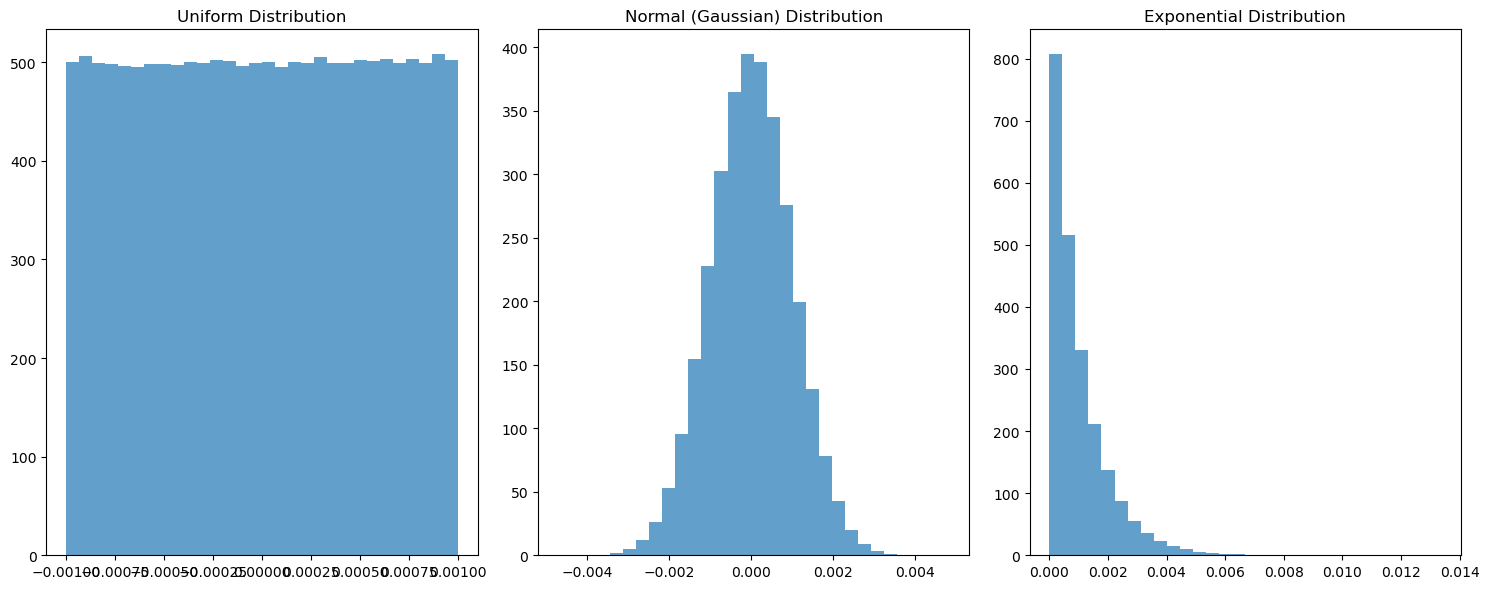

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generating data for each distribution
uniform_data = np.random.uniform(-.001, .001, 1000000)
normal_data = np.random.normal(0, .001, 1000000)
exponential_data = np.random.exponential(.001, 1000000)

# Plotting the PDFs
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
count, bins, ignored = plt.hist(uniform_data, 30, density=True, alpha=0.7)
plt.title('Uniform Distribution')

plt.subplot(1, 3, 2)
count, bins, ignored = plt.hist(normal_data, 30, density=True, alpha=0.7)
plt.title('Normal (Gaussian) Distribution')

plt.subplot(1, 3, 3)
count, bins, ignored = plt.hist(exponential_data, 30, density=True, alpha=0.7)
plt.title('Exponential Distribution')

plt.tight_layout()
plt.show()


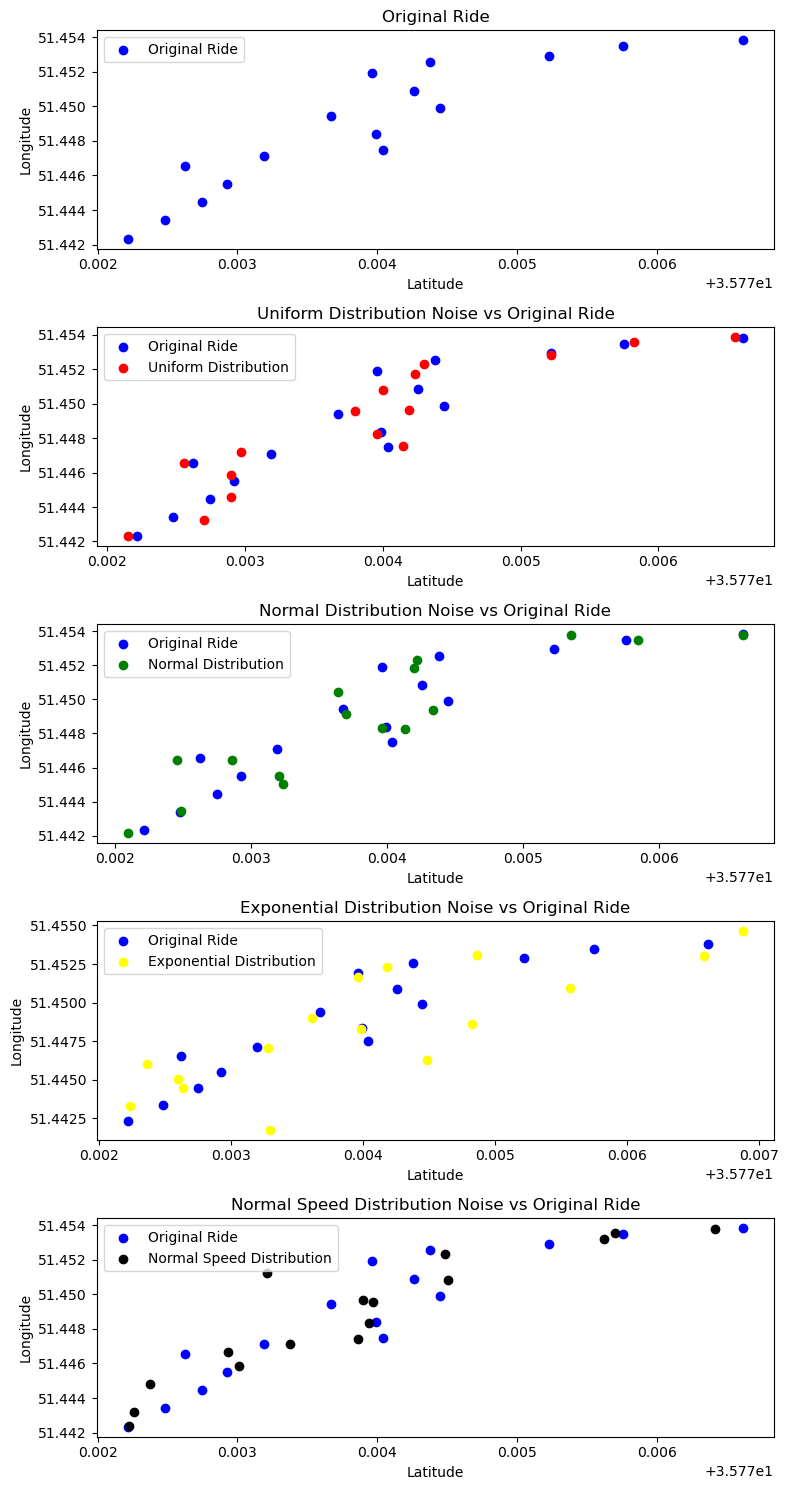

In [59]:
import matplotlib.pyplot as plt

# Create subplots for each type of ride
fig, axs = plt.subplots(5, 1, figsize=(8, 15))

# Scatterplot for 'original' ride
axs[0].scatter([x[0] for x in ride], [x[1] for x in ride], color='blue', label='Original Ride')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude') 
axs[0].legend()
axs[0].set_title('Original Ride')

# Scatterplot for 'uniform' ride
axs[1].scatter([x[0] for x in ride], [x[1] for x in ride], color='blue', label='Original Ride')
axs[1].scatter([x[0] for x in ride_uniform], [x[1] for x in ride_uniform], color='red', label='Uniform Distribution')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude') 
axs[1].legend()
axs[1].set_title('Uniform Distribution Noise vs Original Ride')

# Scatterplot for 'normal' ride
axs[2].scatter([x[0] for x in ride], [x[1] for x in ride], color='blue', label='Original Ride')
axs[2].scatter([x[0] for x in ride_normal], [x[1] for x in ride_normal], color='green', label='Normal Distribution')
axs[2].set_xlabel('Latitude')
axs[2].set_ylabel('Longitude') 
axs[2].legend()
axs[2].set_title('Normal Distribution Noise vs Original Ride')

# Scatterplot for 'exponential' ride
axs[3].scatter([x[0] for x in ride], [x[1] for x in ride], color='blue', label='Original Ride')
axs[3].scatter([x[0] for x in ride_exponential], [x[1] for x in ride_exponential], color='yellow', label='Exponential Distribution')
axs[3].set_xlabel('Latitude')
axs[3].set_ylabel('Longitude') 
axs[3].legend()
axs[3].set_title('Exponential Distribution Noise vs Original Ride')

# Scatterplot for 'normal_speed' ride
axs[4].scatter([x[0] for x in ride], [x[1] for x in ride], color='blue', label='Original Ride')
axs[4].scatter([x[0] for x in ride_normal_speed], [x[1] for x in ride_normal_speed], color='black', label='Normal Speed Distribution')
axs[4].set_xlabel('Latitude')
axs[4].set_ylabel('Longitude') 
axs[4].legend()
axs[4].set_title('Normal Speed Distribution Noise vs Original Ride')

plt.tight_layout()
plt.show()


In [60]:

data_ride = {
    'lat': [x[0] for x in ride],
    'lon': [x[1] for x in ride],
    'timestamp': [int(time.time() + i)  for i in range(len(ride))]
}
data_ride_uniform = {
    'lat': [x[0] for x in ride_uniform],
    'lon': [x[1] for x in ride_uniform],
    'timestamp': [int(time.time() + i)  for i in range(len(ride_uniform))]
}
data_ride_normal = {
    'lat': [x[0] for x in ride_normal],
    'lon': [x[1] for x in ride_normal],
    'timestamp': [int(time.time() + i)  for i in range(len(ride_normal))]
}
data_ride_exponential = {
    'lat': [x[0] for x in ride_exponential],
    'lon': [x[1] for x in ride_exponential],
    'timestamp': [int(time.time() + i)  for i in range(len(ride_exponential))]
}
data_ride_normal_speed = {
    'lat': [x[0] for x in ride_normal_speed],
    'lon': [x[1] for x in ride_normal_speed],
    'timestamp': [int(time.time() + i)  for i in range(len(ride_normal_speed))]
}

df_ride = pd.DataFrame(data_ride, columns=['lat', 'lon', 'timestamp'])
df_ride_uniform = pd.DataFrame(data_ride_uniform, columns=['lat', 'lon', 'timestamp'])
df_ride_normal = pd.DataFrame(data_ride_normal, columns=['lat', 'lon', 'timestamp'])
df_ride_exponential = pd.DataFrame(data_ride_exponential, columns=['lat', 'lon', 'timestamp'])
df_ride_normal_speed = pd.DataFrame(data_ride_normal_speed, columns=['lat', 'lon', 'timestamp'])

In [61]:
map_4 = KeplerGl(height=600,)
map_4.add_data(data=df_ride, name='Original')
map_4.add_data(data=df_ride_uniform, name='Uniform')
map_4.add_data(data=df_ride_normal, name='Normal')
map_4.add_data(data=df_ride_exponential, name='Exponential')
map_4.add_data(data=df_ride_normal_speed, name='Normal_speed')
map_4

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Original': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'columns': ['lat'…

**Explanation of my noise model:**

Adding noise to our data based on normal distribution seems like a perfectly fine assumption about the noise present in the noisy reads from GPS. This distribution works fine for describing random errors and is widely used for a lot of adding noise models because of the Centeral Limit Theorem. Because the amount of noise in the gps reads also depends on the speed of the traveler, it also is a good idea to let it influence the amount of noise being injected to our data. So, in my opinion the ```add_normal_speed_noise(ride, gps_radius, speed)``` function is the best candidate for adding noise to the rides.

Visualize a sample `ride` and its corresponding `noisy_ride` (using your selected noise model) on the map.

In [62]:
#TODO: Visualize using kepler
ride_speed = 60     # in m/s
ride_gps_time = 2   # in s
trip = find_shortest_path(nodes[4695975717], nodes[4698344869], pasdaran_streets)
ride = visualize_a_ride(ride_speed, ride_gps_time, trip)
noisy_ride = add_normal_speed_noise(ride, 40, ride_speed)

data_ride = {
    'lat': [x[0] for x in ride],
    'lon': [x[1] for x in ride],
    'timestamp': [int(time.time() + i)  for i in range(len(ride))]
}
data_noisy_ride = {
    'lat': [x[0] for x in noisy_ride],
    'lon': [x[1] for x in noisy_ride],
    'timestamp': [int(time.time() + i)  for i in range(len(noisy_ride))]
}

df_ride = pd.DataFrame(data_ride, columns=['lat', 'lon', 'timestamp'])
df_noisy_ride = pd.DataFrame(data_noisy_ride, columns=['lat', 'lon', 'timestamp'])

In [63]:
map_5 = KeplerGl(height=600, config = config_5)
map_5.add_data(data=df_ride, name='Original')
map_5.add_data(data=df_noisy_ride, name='Noisy')
map_5

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'aubru7o', 'type': …

Now, we create our dataset, We create 20 noisy_rides for each trip.

In [64]:
#TODO: create and store 20 noisy_rides as a dataset for our HMM to train on it and experiment with it

num_rides = 20
pasdaran_nodes = pd.read_csv('pasdaran_nodes.csv')
nodes = np.array(pasdaran_nodes)
nodes = {nodes[i][0]: (nodes[i][1], nodes[i][2]) for i in range(len(nodes))}

trip_id = []
index = []
source = []
destination = []
lat = []
lon = []
ride_speed = []
ride_gps_time = []

trip_id_noisy = []
index_noisy = []
source_noisy = []
destination_noisy = []
lat_noisy = []
lon_noisy = []
ride_speed_noisy = []
ride_gps_time_noisy = []



i = 0
while(i < num_rides):
    speed = random.random()*60
    gps_time = random.random()*100
    gps_radius = 40
    s = random.choice(list(nodes.keys()))
    t = random.choice(list(nodes.keys()))
    trip = find_shortest_path(nodes[s], nodes[t], pasdaran_streets)
    if trip == [] or speed == 0 or gps_time == 0:
        continue
    ride = visualize_a_ride(speed, gps_time, trip)
    if len(ride) < 5:
        continue

    for k in range(len(ride)):
        trip_id.append(i)
        index.append(k)
        source.append(s)
        destination.append(t)
        lat.append(ride[k][0])
        lon.append(ride[k][1])
        ride_speed.append(speed)
        ride_gps_time.append(gps_time)

    noisy_ride = add_normal_speed_noise(ride, gps_radius, speed)
    for j in range(len(noisy_ride)):
        trip_id_noisy.append(i)
        index_noisy.append(j)
        source_noisy.append(s)
        destination_noisy.append(t)
        lat_noisy.append(noisy_ride[j][0])
        lon_noisy.append(noisy_ride[j][1])
        ride_speed_noisy.append(speed)
        ride_gps_time_noisy.append(gps_time)
    i += 1


rides = {
    'trip_id': trip_id,
    'index': index,
    'source': source,
    'destination': destination,
    'lat': lat,
    'lon': lon,
    'ride_speed': ride_speed,
    'ride_gps_time': ride_gps_time
}

noisy_rides = {
    'trip_id': trip_id_noisy,
    'index': index_noisy,
    'source': source_noisy,
    'destination': destination_noisy,
    'lat': lat_noisy,
    'lon': lon_noisy,
    'ride_speed': ride_speed_noisy,
    'ride_gps_time': ride_gps_time_noisy
}

df_rides = pd.DataFrame(rides, columns=['trip_id', 'index', 'source', 'destination', 'lat', 'lon', 'ride_speed', 'ride_gps_time'])
df_noisy_rides = pd.DataFrame(noisy_rides, columns=['trip_id', 'index', 'source', 'destination', 'lat', 'lon', 'ride_speed', 'ride_gps_time'])

df_rides.to_csv('original_rides.csv')
df_noisy_rides.to_csv('noisy_rides.csv')  


# HMM

In this section, we want to use the dataset that we created in the previous section to train an HMM model. We want to use HMM models to  **denoise** the gps locations of the rides. We assume that the gps locations of the rides are noisy and we want to denoise them using HMM models. The observations in each _timestamp_ are the observed noisy points in the dataset.

You should implement a class (or function) named HMM which gets the noisy observations and the `streets` of the map (of course, this is not noisy. we saw that as `pasdaran_streets` in the previous section). You should calculate the transition matrix and emission matrix of the HMM model. You should also implement the `viterbi` algorithm to find the most probable sequence of hidden states (which are the points in the streets) given the noisy observations. Finally, your implementation should be capable of returning the denoised gps locations of the rides. Note that how you define your features, and your states. Be creative!

In [65]:
#TODO: Implement helper functions for your calculations

In [66]:
# Define your HMM model
# Hint: You can assume states of your HMM model to be streets of the map. You may use other designs as well (based on your creativity)!
from haversine import haversine, Unit
class HMM:
    def __init__(self, streets):
        streets = np.array(streets)
        self.nodes = {}
        for i in range(len(streets)):
            if int(streets[i, 1]) not in self.nodes:
                self.nodes[streets[i, 1]] = (streets[i, 5], streets[i, 6])
            if int(streets[i, 2]) not in self.nodes:
                self.nodes[streets[i, 2]] = (streets[i, 7], streets[i, 8])
        self.street_nodes = [(self.nodes[streets[i][1]], self.nodes[streets[i][2]]) for i in range(len(streets))]


    def preprocess_ride(self, ride, num):
        new_ride = []
        for i in range(len(ride) - 1):
            new_ride.append(ride[i])
            for j in range(num-1):
                new_point = ((j/num) * ride[i][0] + (1 - j/num) * ride[i+1][0], (j/num) * ride[i][1] + (1 - j/num) * ride[i+1][1])
                new_ride.append(new_point)
        new_ride.append(ride[-1])
        return new_ride
    

    def distance_point_to_line(self, point, p1, p2, precission):
        min_haversine_distance = np.inf
        best_point = None
        for i in range(precission+1):
            dist = haversine(point,  ((((i/precission) * p1[0]) + (((precission-i)/precission) * p2[0])), (((i/precission) * p1[1]) + (((precission-i)/precission) * p2[1]))))
            if dist < min_haversine_distance:
                min_haversine_distance = dist
                best_point = ((((i/precission) * p1[0]) + (((precission-i)/precission) * p2[0])), (((i/precission) * p1[1]) + (((precission-i)/precission) * p2[1])))
        return min_haversine_distance, best_point
    

    def distance_point_to_all(self, point, lines, precission):
        distances = []
        best_points = []
        for i in range(len(lines)):
            distance, best_point = (self.distance_point_to_line(point, lines[i][0], lines[i][1], precission))
            distances.append(distance)
            best_points.append(best_point)
        return distances, best_points
    

    def calculate_projection(self, point, p1, p2, precission):
        min_haversine_distance = np.inf
        best_point = None
        for i in range(precission+1):
            dist = haversine(point,  ((((i/precission) * p1[0]) + (((precission-i)/precission) * p2[0])), (((i/precission) * p1[1]) + (((precission-i)/precission) * p2[1]))))
            if dist < min_haversine_distance:
                min_haversine_distance = dist
                best_point = ((((i/precission) * p1[0]) + (((precission-i)/precission) * p2[0])), (((i/precission) * p1[1]) + (((precission-i)/precission) * p2[1])))
        return best_point


    def transition_prob(self, obs0, obs1, point0, point1, beta):
        dist = np.abs(haversine(obs0, obs1) - haversine(point0, point1))
        prob = np.exp(-(dist/beta))/beta
        return prob
        

    def viterbi(self, ride, precission, num_candidates, beta):
        if ride is None or len(ride) == 0:
            return []
        
        scores = np.ones((len(self.street_nodes)))
        first_obs = ride[0]
        distances, best_points = self.distance_point_to_all(first_obs, self.street_nodes, precission)
        distances = np.array(distances)
        candidates = np.argsort(distances)[:num_candidates]
        emmisions = np.zeros((len(self.street_nodes)))
        for i in candidates:
            emmisions[i] = np.exp(-distances[i])
        scores = scores * emmisions
        paths = {i:[] for i in range(len(self.street_nodes))}

        for o in range(1, len(ride)):
            new_scores = np.copy(scores)
            new_paths = {i:[] for i in range(len(self.street_nodes))}
            next_distances, next_best_points = self.distance_point_to_all(ride[o], self.street_nodes, precission)
            next_distances = np.array(next_distances)
            next_candidates = np.argsort(next_distances)[:num_candidates]
            next_emmisions = np.zeros((len(self.street_nodes)))
            for i in next_candidates:
                next_emmisions[i] = np.exp(-next_distances[i])
            for i in next_candidates:
                max_score = -np.inf
                for j in candidates:
                    score = scores[j] * next_emmisions[i]
                    score *= self.transition_prob(ride[o-1], ride[o], best_points[j], next_best_points[i], beta)
                    if score > max_score:
                        max_score = score
                        new_scores[i] = score
                        new_paths[i] = paths[j] + [j]

            scores = new_scores
            paths = new_paths
            distances = next_distances
            candidates = next_candidates
            best_points = next_best_points
            emmisions = next_emmisions

        last_state = np.argmax(scores)
        best_path = paths[np.argmax(scores)]
        best_path.append(last_state)
        return best_path
    

    def denoise(self, ride, precission=20, num_augmented=4, num_candidates=3, beta=.6):
        if ride is None or len(ride) == 0:
            return []
        ride = self.preprocess_ride(ride, num_augmented)
        best_streets = self.viterbi(ride, precission, num_candidates, beta)
        new_ride = []
        
        for r in range(len(ride)):
            line = (self.street_nodes[best_streets[r]][0], self.street_nodes[best_streets[r]][1])
            projection = self.calculate_projection(ride[r], line[0], line[1], precission)
            new_ride.append(projection)
            
        result = []
        for i in range(len(new_ride)):
            if i % num_augmented == 0:
                result.append(new_ride[i])
        return result


In [67]:
# Use Viterbi Algorithm to find the most probable set of points (denoised points)
test_noisy = pd.read_csv("noisy_rides.csv")
test_original = pd.read_csv("original_rides.csv")

test_noisy = test_noisy[test_noisy['trip_id'] == 0]
test_original = test_original[test_original['trip_id'] == 0]
noisy_ride = []
for j in range(len(test_noisy)):
    noisy_ride.append((test_noisy.iloc[j]['lat'], test_noisy.iloc[j]['lon']))
original_ride = []
for k in range(len(test_original)):
    original_ride.append((test_original.iloc[k]['lat'], test_original.iloc[k]['lon']))

hmm = HMM(pasdaran_streets)
denoised_ride = hmm.denoise(noisy_ride)

Visualize a sample denoised _ride_ using your HMM model. Put `original_points` and `denoised_points` on the map. Use different colors for each of them to make them distinct from eachother. You should use `kepler` library for this purpose.

In [68]:
#TODO: Visualize a sample noisy_ride alongside its denoised version
data_original_ride = {
    'lat': [x[0] for x in original_ride],
    'lon': [x[1] for x in original_ride],
    'timestamp': [int(time.time() + i)  for i in range(len(original_ride))]
}
data_noisy_ride = {
    'lat': [x[0] for x in noisy_ride],
    'lon': [x[1] for x in noisy_ride],
    'timestamp': [int(time.time() + i)  for i in range(len(noisy_ride))]
}
data_denoised_ride = {
    'lat': [x[0] for x in denoised_ride],
    'lon': [x[1] for x in denoised_ride],
    'timestamp': [int(time.time() + i)  for i in range(len(denoised_ride))]
}

df_original_ride = pd.DataFrame(data_original_ride, columns=['lat', 'lon', 'timestamp'])
df_noisy_ride = pd.DataFrame(data_noisy_ride, columns=['lat', 'lon', 'timestamp'])
df_denoised_ride = pd.DataFrame(data_denoised_ride, columns=['lat', 'lon', 'timestamp'])

In [69]:
map_6 = KeplerGl(height=600, config=config_6)
map_6.add_data(data=df_noisy_ride, name='Noisy')
map_6.add_data(data=df_denoised_ride, name='Denoised')
map_6

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'fmvpuni', 'type': …

# Testing your model

In this section, you should test your model. You could use your dataset (which you generated, step-by-step) until now, to implement, debug and train your model. Now, you should load `test_dataset` that we provided to you as `noisy_test_dataset.csv` and `original_test_dataset.csv`. Run your model on `noisy_test_dataset` and use `original_test_dataset` to evaluate how good you did. run your model on `noisy_test_dataset` to denoise the points. You should put the denoised points in a csv file named `denoised_test_dataset.csv` and submit it with your notebook. Also, You should report the **Mean haversine distance (MHD)** as the measaure of the loss of your model. Go through each trip in the `noisy_test_dataset` and calculate the MHD for each trip. Finally, report the average of the MHDs of all the trips in the `test_dataset` as the MHD of your model.

In [70]:
from haversine import haversine
from tqdm import tqdm

def mean_haversine_distance(denoised_points, original_points):
    sum_distance = 0
    for i in range(len(denoised_points)):
        sum_distance += haversine(denoised_points[i], original_points[i])
    if len(denoised_points) == 0:
        return 0
    return sum_distance/len(denoised_points)

test_dataset_noisy = pd.read_csv("noisy_test_dataset.csv")
test_dataset_original = pd.read_csv("original_test_dataset.csv")

test_dataset_original.head()

,Unnamed: 0,trip_id,index,source,destination,lat,lon,ride_speed,ride_gps_time
0,0,0,0,4429680702,4695666788,35.771816,51.461178,0.00096,0.466
1,0,0,1,4429680702,4695666788,35.771458,51.460865,0.00096,0.466
2,0,0,2,4429680702,4695666788,35.770760,51.460239,0.00096,0.466
3,0,0,3,4429680702,4695666788,35.770027,51.459633,0.00096,0.466
4,0,0,4,4429680702,4695666788,35.769318,51.459030,0.00096,0.466


In [71]:
test_dataset_noisy.head()

,Unnamed: 0,trip_id,index,source,destination,lat,lon,ride_speed,ride_gps_time
0,0,0,0,4429680702,4695666788,35.771917,51.461279,0.00096,0.466
1,0,0,1,4429680702,4695666788,35.771399,51.460806,0.00096,0.466
2,0,0,2,4429680702,4695666788,35.770759,51.460239,0.00096,0.466
3,0,0,3,4429680702,4695666788,35.769997,51.459603,0.00096,0.466
4,0,0,4,4429680702,4695666788,35.769289,51.459002,0.00096,0.466


In [72]:
# Iterate through each noisy ride and denoise it, then calculate the mean haversine distance between the denoised ride and the original ride
# Report the Average Mean Haversine Distance for all the rides in the test dataset
# This should be of order 10^-3
# Iterate through each noisy ride and denoise it, then calculate the mean haversine distance between the denoised ride and the original ride
# Report the Average Mean Haversine Distance for all the rides in the test dataset
# This should be of order 10^-3
hmm = HMM(pasdaran_streets)
sum_errors = 0

trip_id_denoised = []
index_denoised = []
source_denoised = []
destination_denoised = []
lat_denoised = []
lon_denoised = []
ride_speed_denoised = []
ride_gps_time_denoised = []

for i in tqdm(range(20)):
    test_noisy = test_dataset_noisy[test_dataset_noisy['trip_id'] == i]
    test_original = test_dataset_original[test_dataset_original['trip_id'] == i]
    noisy_ride = []
    for j in range(len(test_noisy)):
        noisy_ride.append((test_noisy.iloc[j]['lat'], test_noisy.iloc[j]['lon']))
    original_ride = []
    for k in range(len(test_original)):
        original_ride.append((test_original.iloc[k]['lat'], test_original.iloc[k]['lon']))
    
    denoised_ride = hmm.denoise(noisy_ride)
    sum_errors += mean_haversine_distance(denoised_ride, original_ride)

    if len(original_ride) > 0: 
        trip_id = i
        source = test_noisy.iloc[0]['source']
        destination = test_noisy.iloc[0]['destination']
        ride_speed = test_noisy.iloc[0]['ride_speed']
        ride_gps_time = test_noisy.iloc[0]['ride_gps_time']
        for j in range(len(denoised_ride)):
            trip_id_denoised.append(trip_id)
            index_denoised.append(j)
            source_denoised.append(source)
            destination_denoised.append(destination)
            lat_denoised.append(denoised_ride[j][0])
            lon_denoised.append(denoised_ride[j][1])
            ride_speed_denoised.append(ride_speed)
            ride_gps_time_denoised.append(ride_gps_time)


denoised_rides = {
    'trip_id': trip_id_denoised,
    'index': index_denoised,
    'source': source_denoised,
    'destination': destination_denoised,
    'lat': lat_denoised,
    'lon': lon_denoised,
    'ride_speed': ride_speed_denoised,
    'ride_gps_time': ride_gps_time_denoised
}
denoised_df =  pd.DataFrame(denoised_rides, columns=['trip_id', 'index', 'source', 'destination', 'lat', 'lon', 'ride_speed', 'ride_gps_time'])
denoised_df.to_csv('denoised_test_dataset.csv')

100%|██████████| 20/20 [00:55<00:00,  2.79s/it]


In [73]:
print(f"Average loss: {sum_errors/20}")

Average loss: 0.006487460763122825


**How to submit**: You should submit your notebook and the `denoised_test_dataset.csv` file. Your codes are verified based on the "Mean haversine distance" value that your code gets and the `denoised_test_dataset.csv`. Also, note that for the **shortest path** section, you should have submitted the `.py` file, containing the `def find_shotest_path(start_node, end_node, graph)` function (and all of necessary imports) on quera. Your code will be verified based on the correctness of the shortest path that you find. So, you should submit these in total:
1. `STUDENT_NUMBER_Phase1.ipynb` or `.zip` file containing your notebook and the `denoised_test_dataset.csv` file.
2. `STUDENT_NUMBER_Phase1.py` file containing the `find_shortest_path` function. (Also submit this to the related section in quera)
3. Printed out Average Haversine Distance in the last cell of notebook. (This should be of order $10^{-3}$)